In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as mp
from scipy import integrate
%matplotlib widget

In [2]:
# Senkrechte Linien zeichnen
def drawLines(ax, zeroRange, activeRange):
    ax.axvline(activeRange.start, color='red', lw=1)
    ax.axvline(activeRange.stop, color='red', lw=1)
    ax.axvline(zeroRange.start, color='grey', lw=0.5)
    ax.axvline(zeroRange.stop, color='grey', lw=0.5)

In [3]:
def calcEnergy(name, zeroRange, activeRange):
    print('Datei:', name)
    data = pd.read_csv('../Messwerte/Stromverbrauch/' + name, skiprows=1, index_col=0, sep=',')
    
    # Offset berechnen aus Zeitraum, bei dem der Strom = 0 sein muss
    zeroData = data.loc[zeroRange]
    offset = -zeroData['Ampere'].mean()
    print('Offset:', offset)
    
    data['Ampere'] = data['Ampere'] + offset
    data['Power'] = data['Ampere'] * data['Volt']
    
    
    (aax, vax, pax) = data.plot(y=['Ampere', 'Volt', 'Power'], subplots=True, figsize=(12, 6))
    
    aax.set_title(name)
    pax.set_xlabel('Zeit in s')
    aax.set_ylabel('Strom in A')
    vax.set_ylabel('Spannung in V')
    pax.set_ylabel('Leistung in W')
    aax.get_legend().remove()
    vax.get_legend().remove()
    pax.get_legend().remove()
    
    drawLines(aax, zeroRange, activeRange)
    drawLines(vax, zeroRange, activeRange)
    drawLines(pax, zeroRange, activeRange)
    
    aax.get_figure().savefig(name + ".pdf", bbox_inches='tight')
    
    
    charge = integrate.trapezoid(x=data.index, y=data['Ampere']) / 3600 * 1e6
    print('Stromverbrauch über gesamten Zeitraum:', charge , 'µAh')
    
    # Energieverbrauch nur über als aktiv angegebenen Zeitraum berechnen
    activeData = data.loc[activeRange]
    # Energieverbrauch ist erstmal in Joule. Dann Umrechnung in µWh
    energy = integrate.trapezoid(x=activeData.index, y=activeData['Power']) / 3600 * 1e6
    print('Energieverbrauch: ', energy, ' µWh')

    print()
    return energy

In [4]:
def calcEnergies(files):
    energySum = 0
    for file in files:
        energySum += calcEnergy(file['file'], file['zero'], file['active'])
    return energySum / len(files)

# TI Dev Kit

Datei: stromverbrauch_ti_messung_1.csv
Offset: 0.0005578552000000098
Stromverbrauch über gesamten Zeitraum: 8.020527526435576 µAh
Energieverbrauch:  22.207799542422475  µWh

Datei: stromverbrauch_ti_messung_2.csv
Offset: 0.0005637762986666819
Stromverbrauch über gesamten Zeitraum: 8.209439768032798 µAh
Energieverbrauch:  22.812074658884523  µWh

Datei: stromverbrauch_ti_messung_3.csv
Offset: 0.0005535707413333429
Stromverbrauch über gesamten Zeitraum: 8.253315026002749 µAh
Energieverbrauch:  22.825984916235793  µWh

Datei: stromverbrauch_ti_messung_4.csv
Offset: 0.0005584362400000199
Stromverbrauch über gesamten Zeitraum: 8.222841918389395 µAh
Energieverbrauch:  22.72443933261948  µWh

Datei: stromverbrauch_ti_messung_5.csv
Offset: 0.000574765474265716
Stromverbrauch über gesamten Zeitraum: 8.22670066454515 µAh
Energieverbrauch:  22.787631331423515  µWh

Datei: stromverbrauch_ti_messung_6.csv
Offset: 0.0005770724703121807
Stromverbrauch über gesamten Zeitraum: 8.283306206403646 µAh
Ene

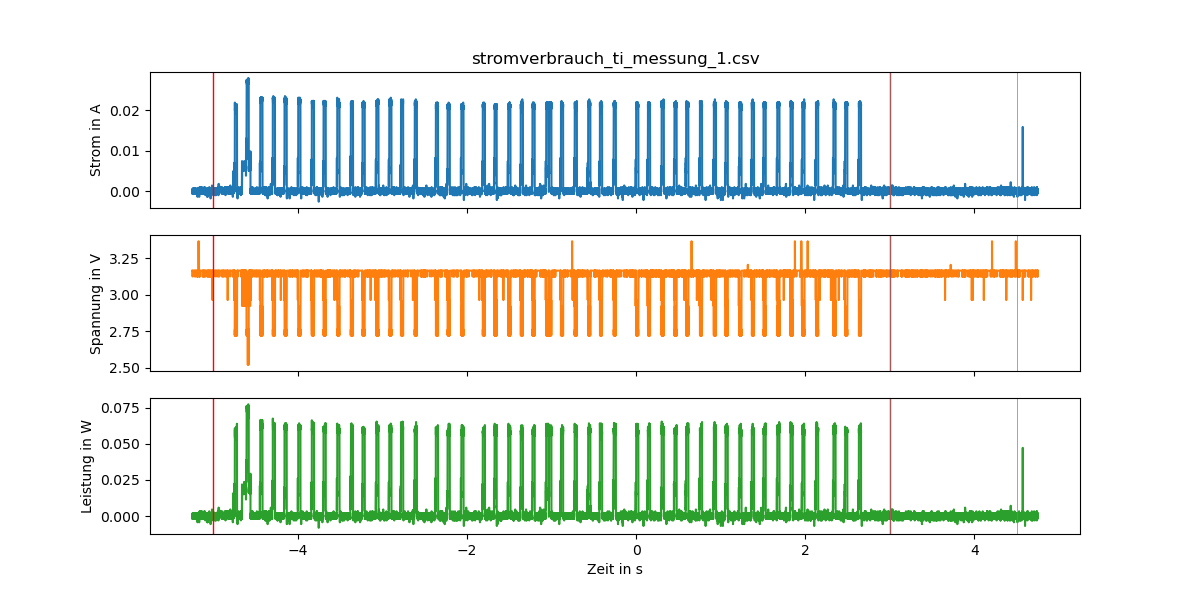

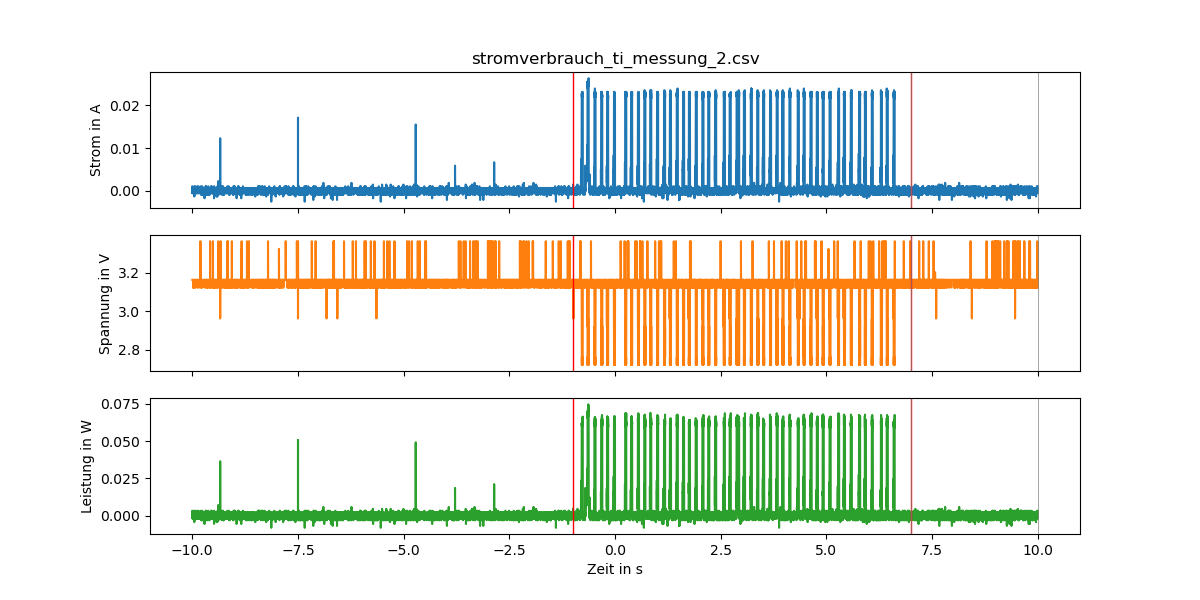

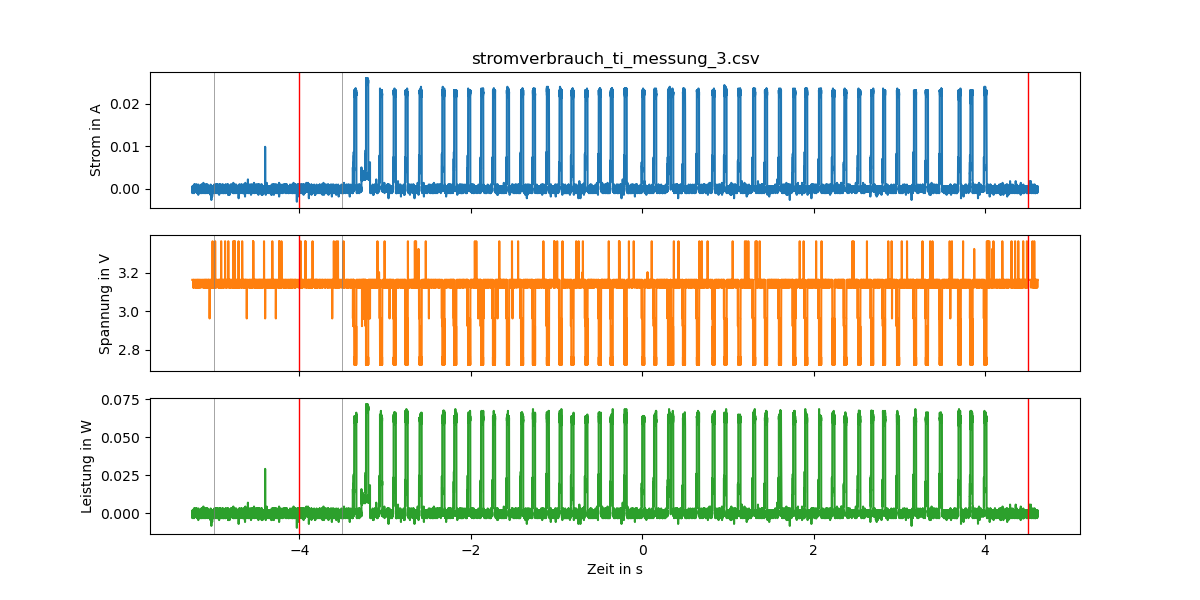

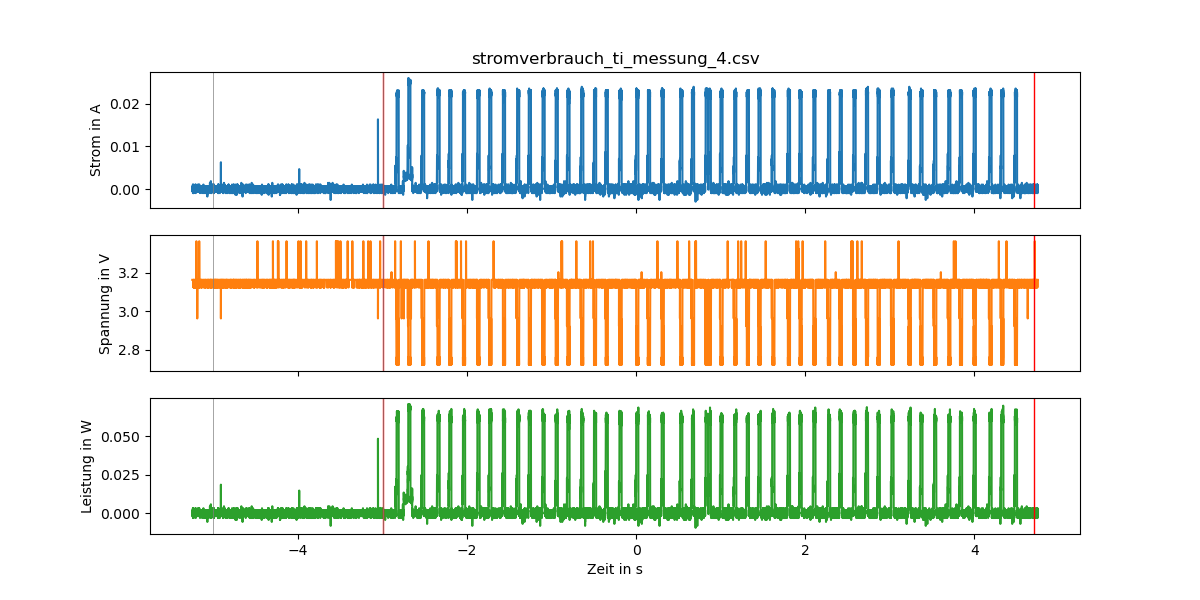

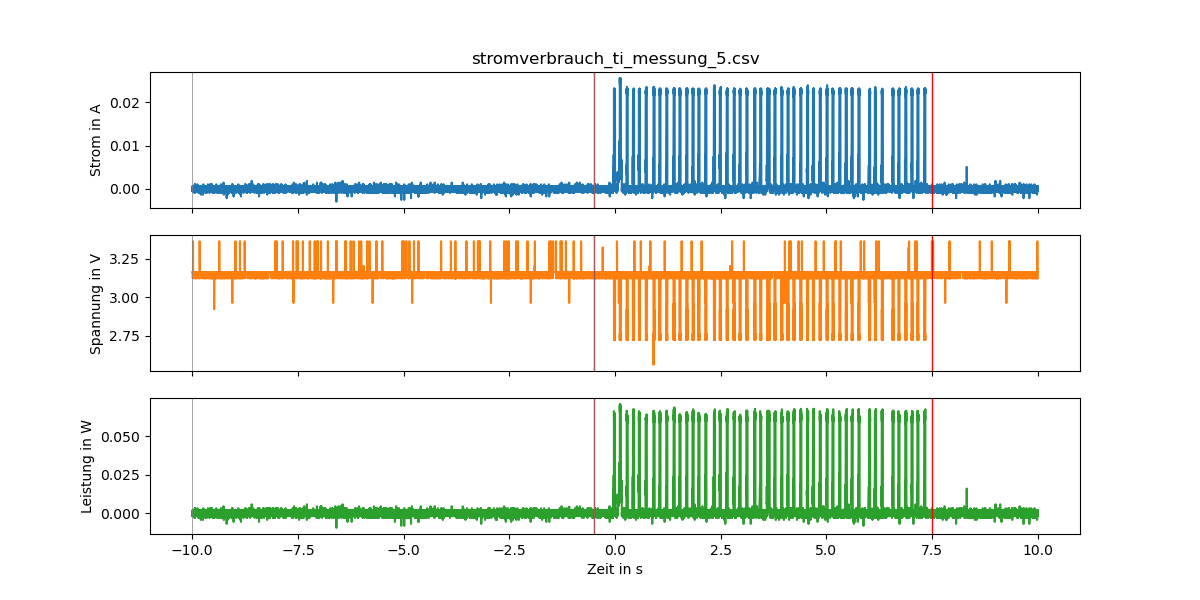

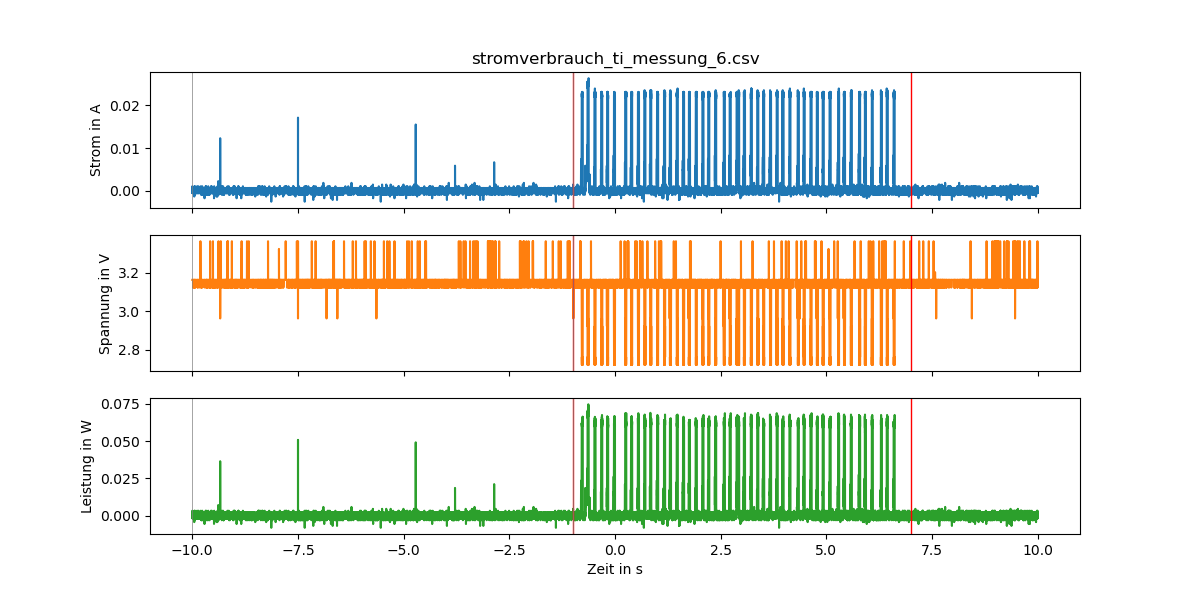

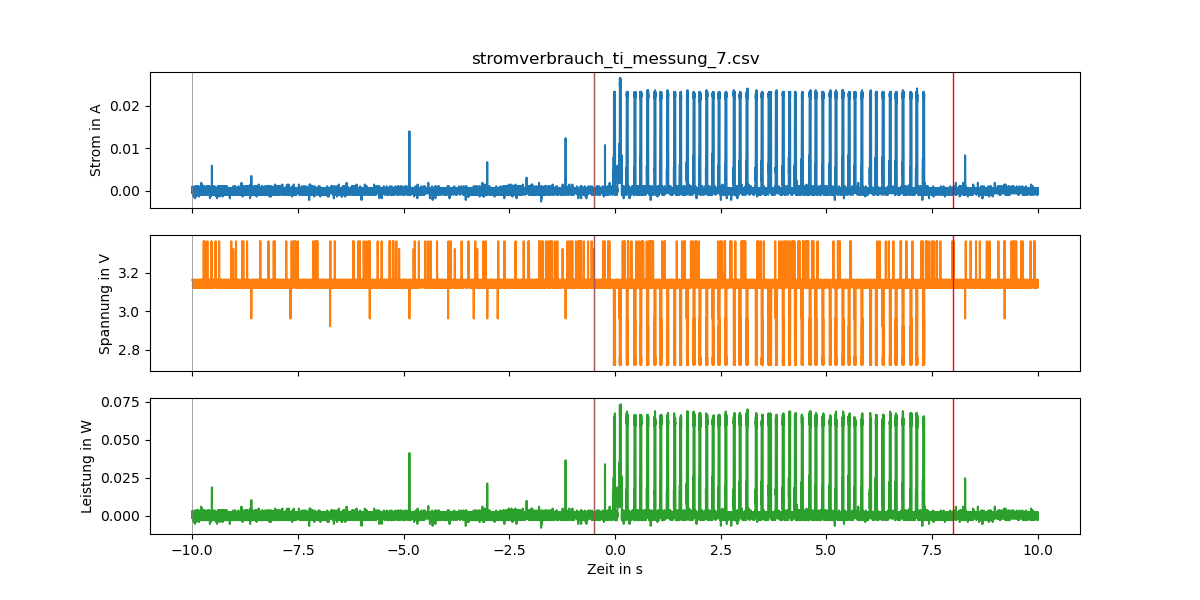

In [5]:
tiFiles = [
    { 'file': 'stromverbrauch_ti_messung_1.csv', 'zero':  slice(3, 4.5), 'active': slice(-5, 3) },
    { 'file': 'stromverbrauch_ti_messung_2.csv', 'zero':  slice(7, 10), 'active': slice(-1, 7) },
    { 'file': 'stromverbrauch_ti_messung_3.csv', 'zero':  slice(-5, -3.5), 'active': slice(-4, 4.5) },
    { 'file': 'stromverbrauch_ti_messung_4.csv', 'zero':  slice(-5, -3), 'active': slice(-3, 4.7) },
    { 'file': 'stromverbrauch_ti_messung_5.csv', 'zero':  slice(-10, -0.5), 'active': slice(-0.5, 7.5) },
    { 'file': 'stromverbrauch_ti_messung_6.csv', 'zero':  slice(-10, -1), 'active': slice(-1, 7) },
    { 'file': 'stromverbrauch_ti_messung_7.csv', 'zero':  slice(-10, -0.5), 'active': slice(-0.5, 8) }
]

tiEnergy = calcEnergies(tiFiles)

# Lansen

Datei: stromverbrauch_lansen_gesamt_messung_1.csv
Offset: 0.0010428080506846222
Stromverbrauch über gesamten Zeitraum: 4.319818978348186 µAh
Energieverbrauch:  7.006087836810962  µWh

Datei: stromverbrauch_lansen_gesamt_messung_2.csv
Offset: 0.0010380743952385775
Stromverbrauch über gesamten Zeitraum: 4.318814260268046 µAh
Energieverbrauch:  7.741644667367885  µWh

Datei: stromverbrauch_lansen_gesamt_messung_3.csv
Offset: 0.001083647849737601
Stromverbrauch über gesamten Zeitraum: 4.306526298733309 µAh
Energieverbrauch:  7.648940908335244  µWh

Datei: stromverbrauch_lansen_gesamt_messung_4.csv
Offset: 0.0010596193843593713
Stromverbrauch über gesamten Zeitraum: 4.243894231384583 µAh
Energieverbrauch:  7.027522125178876  µWh

Datei: stromverbrauch_lansen_senden_messung_1.csv
Offset: 0.0010363436319998384
Stromverbrauch über gesamten Zeitraum: 2.1533657936159054 µAh
Energieverbrauch:  7.70423553684851  µWh

Datei: stromverbrauch_lansen_senden_messung_2.csv
Offset: 0.0003899087103999968
S

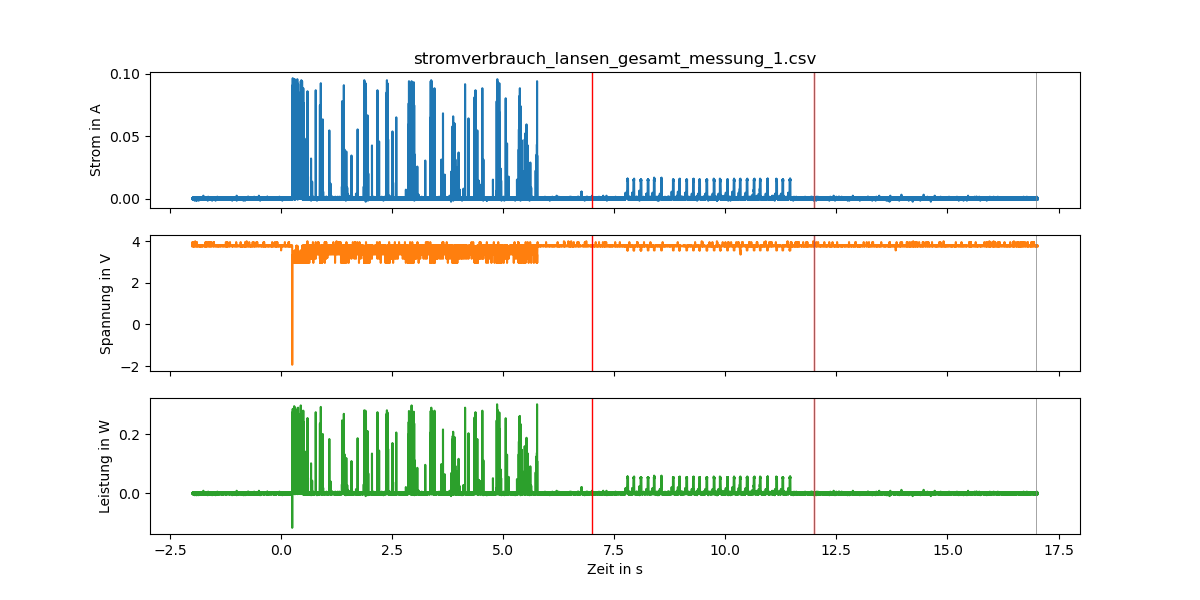

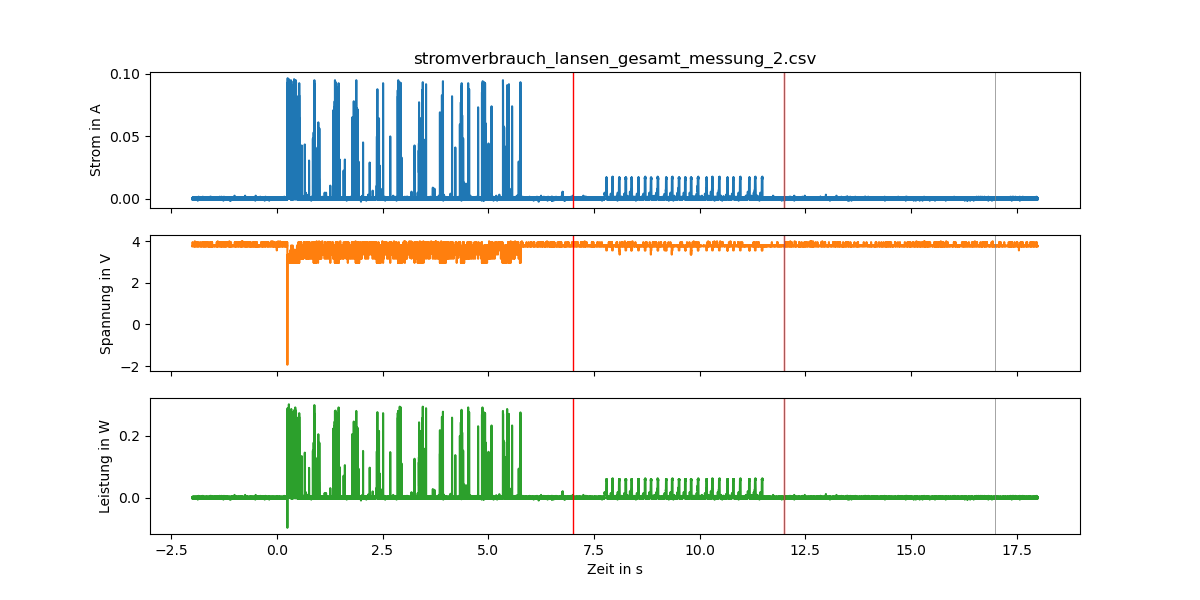

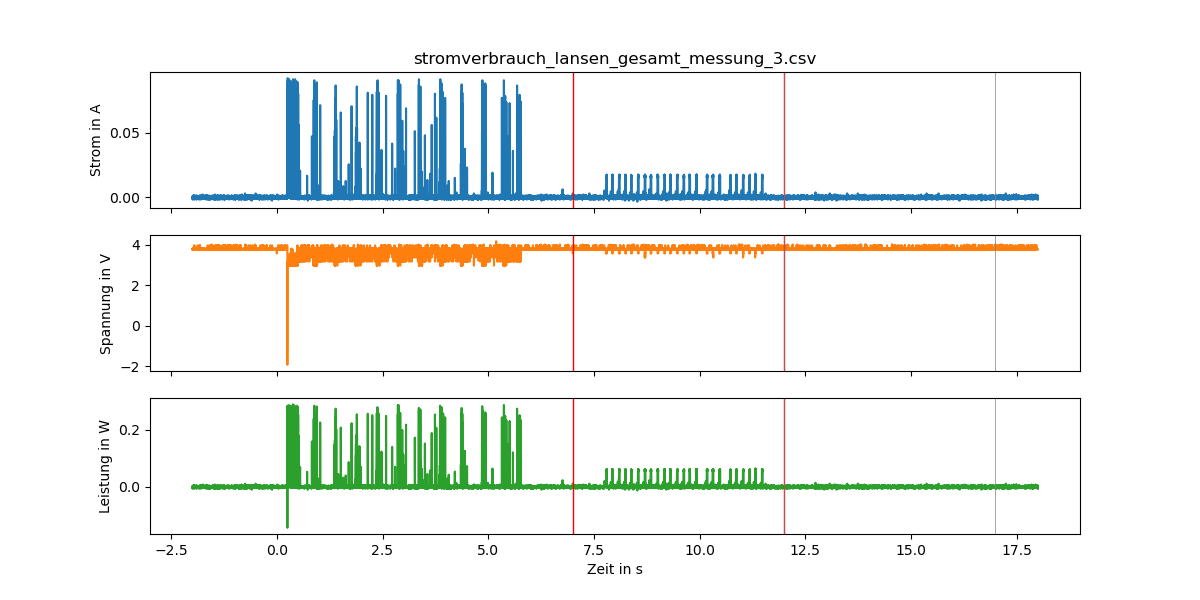

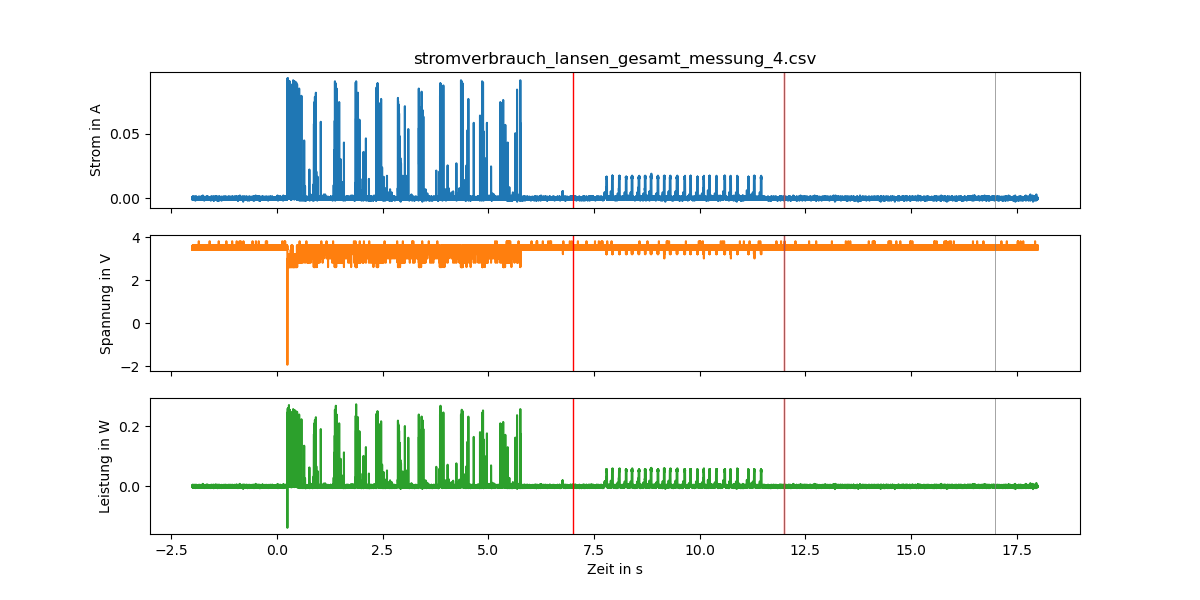

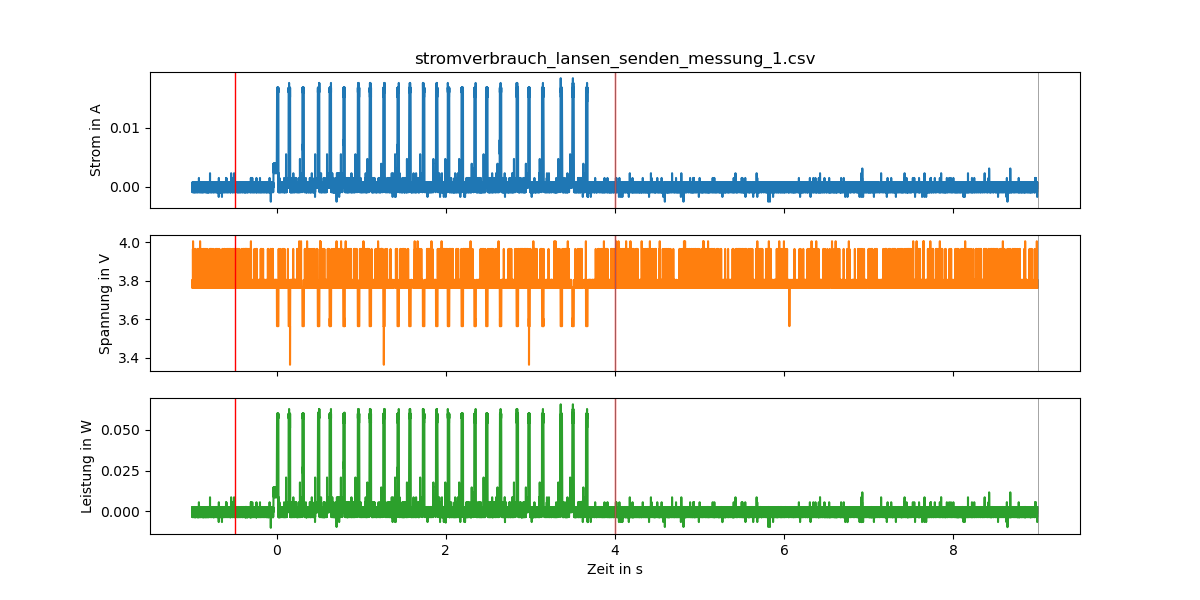

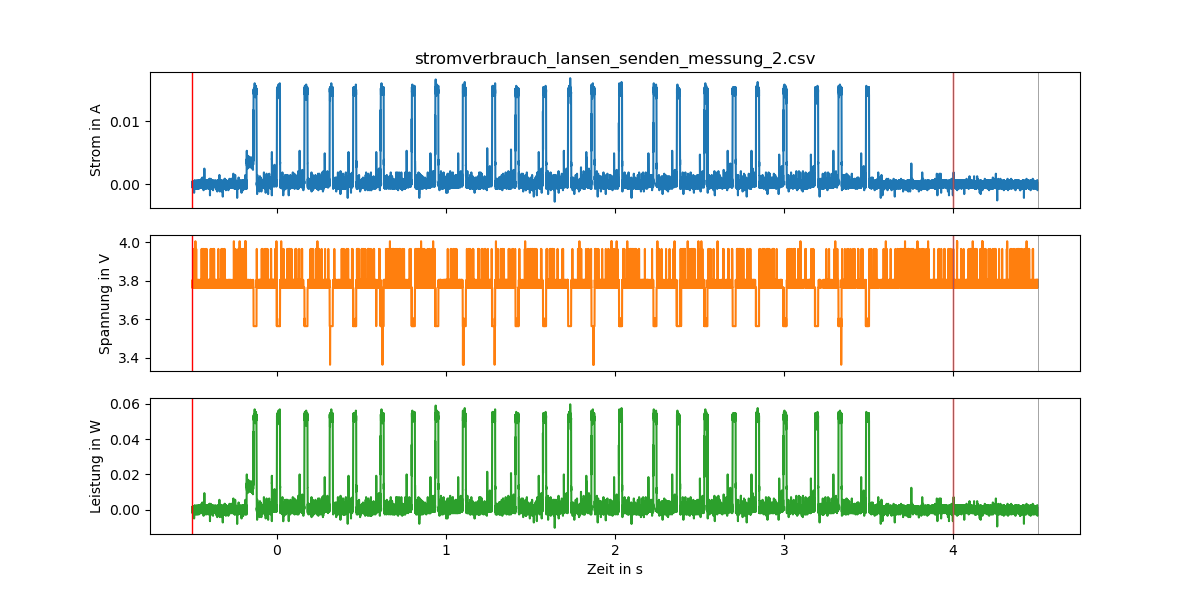

In [6]:
lansenFiles = [
    { 'file': 'stromverbrauch_lansen_gesamt_messung_1.csv', 'zero': slice(12, 17), 'active': slice(7, 12) },
    { 'file': 'stromverbrauch_lansen_gesamt_messung_2.csv', 'zero': slice(12, 17), 'active': slice(7, 12) },
    { 'file': 'stromverbrauch_lansen_gesamt_messung_3.csv', 'zero': slice(12, 17), 'active': slice(7, 12) },
    { 'file': 'stromverbrauch_lansen_gesamt_messung_4.csv', 'zero': slice(12, 17), 'active': slice(7, 12) },
    { 'file': 'stromverbrauch_lansen_senden_messung_1.csv', 'zero': slice(4, 9), 'active': slice(-0.5, 4) },
    { 'file': 'stromverbrauch_lansen_senden_messung_2.csv', 'zero': slice(4, 4.5), 'active': slice(-0.5, 4) }
]
lansenEnergy = calcEnergies(lansenFiles)

# Milesight

Datei: stromverbrauch_milesight_messung_1.csv
Offset: 0.0010266059136345438
Stromverbrauch über gesamten Zeitraum: 5.279375506805451 µAh
Energieverbrauch:  17.463165780947957  µWh

Datei: stromverbrauch_milesight_messung_2.csv
Offset: 0.0010346428988404616
Stromverbrauch über gesamten Zeitraum: 5.26388007410289 µAh
Energieverbrauch:  17.4113956928203  µWh



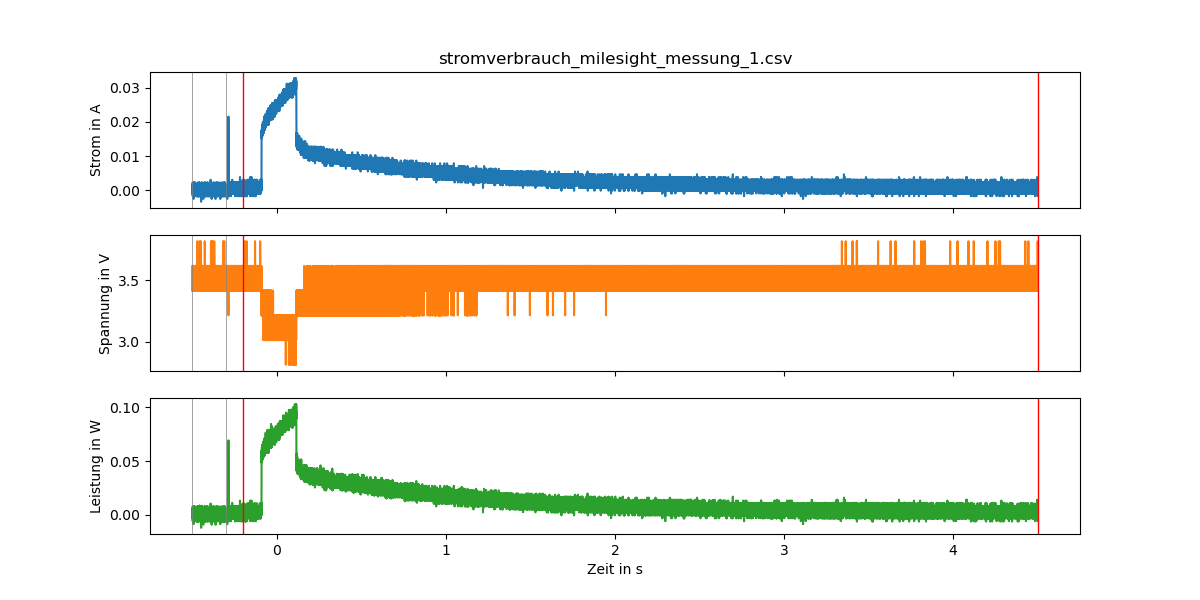

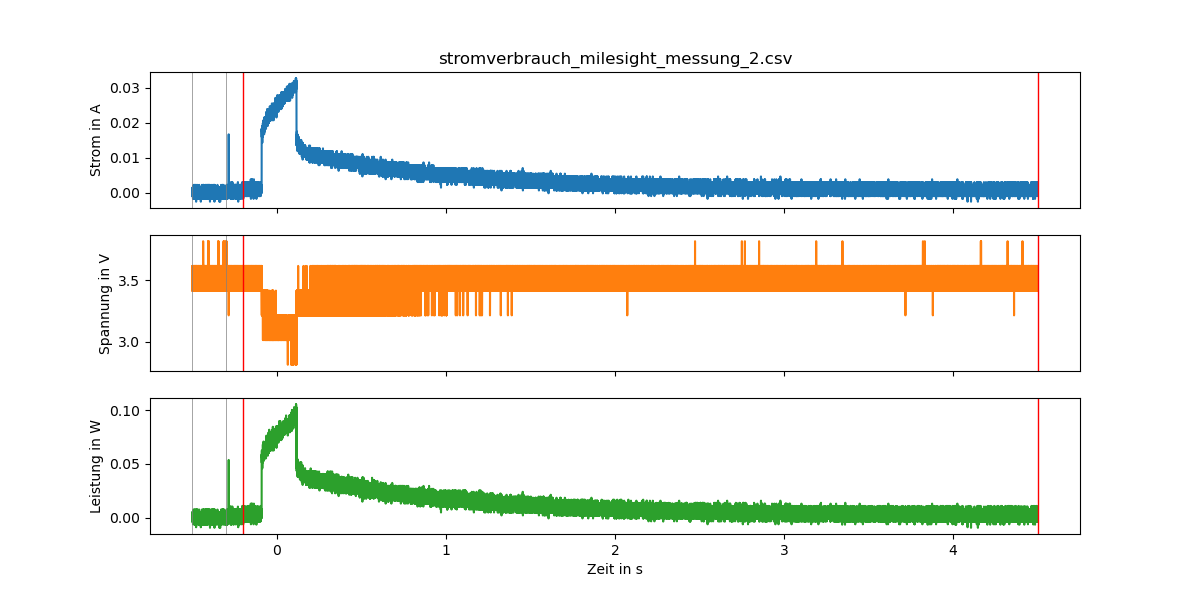

In [7]:
milesightFiles = [
    { 'file': 'stromverbrauch_milesight_messung_1.csv', 'zero': slice(-0.5, -0.3), 'active': slice(-0.2, 4.5) },
    { 'file': 'stromverbrauch_milesight_messung_2.csv', 'zero': slice(-0.5, -0.3), 'active': slice(-0.2, 4.5) }
]
milesightEnergy = calcEnergies(milesightFiles)

# Durschnittlicher Energieverbrauch

In [8]:
print('TI Dev Kit:', tiEnergy, ' µWh')
print('Lansen:', lansenEnergy, ' µWh')
print('Milesight:', milesightEnergy, ' µWh')

TI Dev Kit: 22.74994969756543  µWh
Lansen: 7.352958707833518  µWh
Milesight: 17.437280736884126  µWh
